In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Library import
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import random

from warnings import simplefilter
simplefilter('ignore')

In [ ]:
## Linkage Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data collection check

In [ ]:
## data import
original_path = "/content/drive/MyDrive/Project/CS565_IoT/Data/Third collection/"
audio = pd.read_csv(original_path + "audio_pos_6.csv") # ppg 데이터

In [ ]:
## Check whether system reboots or not. - If empty list, It's status is good
audio.loc[~audio['timestamp'].astype(str).str.isnumeric(), 'timestamp']

Series([], Name: timestamp, dtype: int64)

In [ ]:
## Check whether system records about 3 minute or not
audio['diff'] = (audio['timestamp'].shift(-1) - audio['timestamp']).shift(1)
audio['diff'][0] = 0
audio['duration'] = audio['diff'].cumsum()
audio_final = audio[['duration',' ppg']]
audio_final.columns = ['duration','ppg']
display(audio_final.head(3))
audio_final['duration'].iloc[-1]/1000000 #

,duration,ppg
0,0.0,507
1,9808.0,504
2,19813.0,504


180.552062

In [ ]:
## Check whether PPG signal is acceptable or not
audio_final['ppg'].min(),audio_final['ppg'].max()

(487, 540)

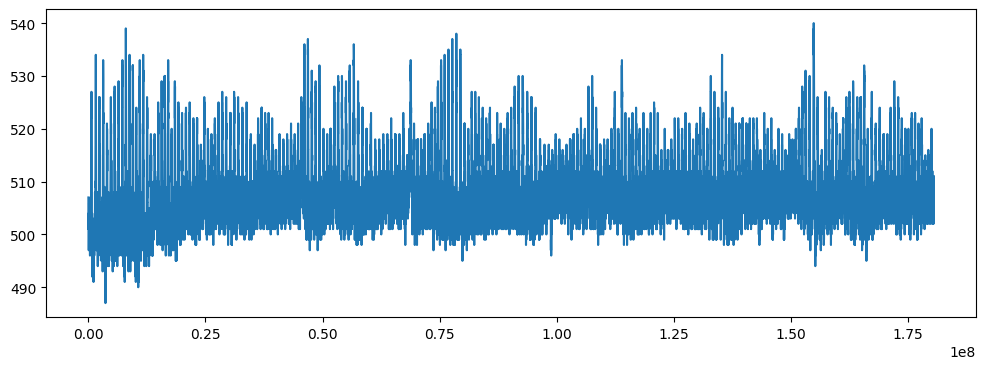

In [ ]:
## Check overall signal

plt.figure(figsize=(12, 4))
plt.plot(audio_final['duration'], audio_final['ppg'])

(0.0, 2400000.0)

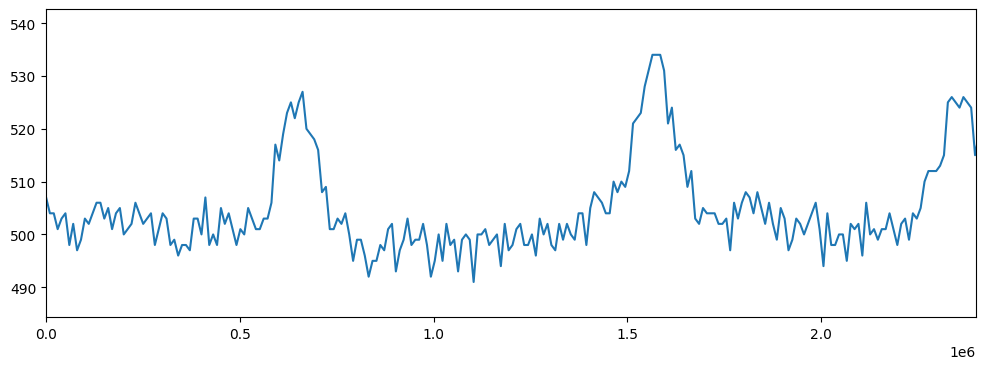

In [ ]:
## Check 5 seconds signal
plt.figure(figsize=(12, 4))
plt.plot(audio_final['duration'], audio_final['ppg'])
plt.xlim(0,2400000) # 2.4초간 데이터 확인

In [ ]:
## Check whether sampling rate is accurate or not!

sec = 180 # 수집된 시간(sec)

for i in range(sec):
  a = audio_final.query("duration >={} and duration <= {}".format(i*1000000,(i+1)*1000000)).shape[0]
  if (a !=100):
    print("sec : ",i," the num of data",a)

초 :  3  수집된 데이터 개수 99
초 :  6  수집된 데이터 개수 99
초 :  9  수집된 데이터 개수 99
초 :  13  수집된 데이터 개수 99
초 :  16  수집된 데이터 개수 99
초 :  20  수집된 데이터 개수 99
초 :  23  수집된 데이터 개수 99
초 :  26  수집된 데이터 개수 99
초 :  30  수집된 데이터 개수 99
초 :  33  수집된 데이터 개수 99
초 :  36  수집된 데이터 개수 99
초 :  39  수집된 데이터 개수 99
초 :  43  수집된 데이터 개수 99
초 :  46  수집된 데이터 개수 99
초 :  50  수집된 데이터 개수 99
초 :  53  수집된 데이터 개수 99
초 :  56  수집된 데이터 개수 99
초 :  59  수집된 데이터 개수 99
초 :  63  수집된 데이터 개수 99
초 :  66  수집된 데이터 개수 99
초 :  69  수집된 데이터 개수 99
초 :  73  수집된 데이터 개수 99
초 :  76  수집된 데이터 개수 99
초 :  80  수집된 데이터 개수 99
초 :  83  수집된 데이터 개수 99
초 :  86  수집된 데이터 개수 99
초 :  90  수집된 데이터 개수 99
초 :  93  수집된 데이터 개수 99
초 :  97  수집된 데이터 개수 99
초 :  100  수집된 데이터 개수 99
초 :  104  수집된 데이터 개수 99
초 :  107  수집된 데이터 개수 99
초 :  111  수집된 데이터 개수 99
초 :  115  수집된 데이터 개수 99
초 :  118  수집된 데이터 개수 99
초 :  122  수집된 데이터 개수 99
초 :  125  수집된 데이터 개수 99
초 :  128  수집된 데이터 개수 99
초 :  131  수집된 데이터 개수 99
초 :  135  수집된 데이터 개수 99
초 :  138  수집된 데이터 개수 99
초 :  141  수집된 데이터 개수 99
초 :  144  수집된 데이터 개수 99
